# <center> Бустинг </center>

### План

1. #### Теория
    - пример для иллюстрации принципа работы бустинга
    - библиотеки: Sklearn, XgBoost, LightGBM, CatBoost
2. #### Практика
    - Пример запуска sklearn.ensemble.GradientBoostingClassifier
3. #### Выводы
4. #### Дополнительный материал: соревнование Porto Seguro Safe Driver's Prediction

<img src='img/boosting.jpg' width=300>

# Теория

### Пример для иллюстрации принципа работы бустинга
Пусть базовые алгоритмы – всего лишь "пеньки", то есть деревья решений глубины 1.
<img src='img/adaboost_toy_step1.png' width=700>
Веса объектов, на которых базовый алгоритм ошибается, увеличиваются (кружки увеличиваются в размере).
<img src='img/adaboost_toy_step2.png' width=700>
В конце базовые алгоритмы "голосуют", их веса определялись $\alpha_t$ в процессе построения.
<img src='img/adaboost_toy_step3.png' width=700>

### Библиотеки

<img src='img/timeline.png'>

#### XgBoost
- есть JVM, Julia, R package
- не умеет обрабатывать категориальные признаки (в отличие от LightGBM и CatBoost)
- зачастую ставится на Windows с большими проблемами

#### LightGBM
- умеет обрабатывать категориальные признаки
- эффективно расходует память
- достаточно часто дает качество чуть лучше, чем CatBoost
 
#### CatBoost
- можно добавить регуляризацию (помогает избежать переобучения)
- есть C и C++ API
- можно использовать красивые средства визуализации: CatBoost Viewer и TensorBoard
- можно прикрутить к ClickHouse
- feature/object importance (можно считать важность не только признаков, но и объектов в выборке)
- делает бэкапы в процессе обучения (если что-то пойдет не так, не нужно будет переучивать модель заново)

# Практика

В sklearn доступны алгоритмы AdaBoost и GradientBoosting для задач классификации и регрессии.
Рассмотрим пример запуска <a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html">GradientBoostingClassifier</a>.

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter("ignore")

## 1. Пример запуска sklearn.ensemble.GradientBoostingClassifier
### <a href='http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html'> Список параметров </a>
- #### метрики
    - loss [default="deviance"] - оптимизируемая функция потерь.  Одна из {"deviance", "exponential"}. Первая соответствует логистической регрессии и возвращает вероятности, вторая - AdaBoost.
- #### процесс обучения
    - learning_rate [default=0.1] - темп обучения, насколько быстро будут меняться веса.
    - n_estimators [default=100] - число итераций градиентного бустинга.
- #### характеристики деревьев в композиции
    - max_depth [default=3] - максимальная глубина деревьев в композиции.
    - min_samples_split [default=2] - минимальное число примеров, необходимое для разветвления в данной вершине.
    - min_samples_leaf [default=1] - минимальное число примеров в листе.
    - min_weight_fraction_leaf [default=0.0] - минимальное взвешенное число примеров в листе.
- #### технические параметры
    - verbose [default=0] - нужно ли печатать отладочный вывод или нет.

### Генерирация датасета для обучения

Будем генерировать выборку из 1000 объектов и 50 признаков с помощью sklearn.datasets.make_classification

In [2]:
# Generating dataset
X, y = make_classification(n_samples=1000, n_features=50, 
                           n_informative=20)

# splitting dataset into train and test
X_train, X_test, y_train, y_test = # your code here

### Обучение GradientBoostingClassifier

In [3]:
# GradientBoostingClassifier initialization
# your code here

# GradientBoostingClassifier fitting
# your code here

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

### Предсказание меток классов

In [4]:
# predict
y_pred = # your code here

# measure accuracy
accuracy = # your code here   

# print accuracy
print(u'Accuracy:', accuracy)

Accuracy: 0.9


## 2. Пример запуска LightGBM

### <a href='https://lightgbm.readthedocs.io/en/latest/Parameters.html'> Список параметров </a>
- #### метрики
    - objective [default="regression"] - оптимизируемая функция потерь. Одна из:
        - regression
        - regression_l1
        - huber
        - fair
        - poisson
        - quantile
        - mape
        - binary
        - multiclass
        - xentropy
        - lambdarank
        - etc.
- #### процесс обучения
    - learning_rate [default=0.1] - темп обучения, насколько быстро будут меняться веса.
    - num_iteration [default=100] - число итераций градиентного бустинга.
- #### характеристики деревьев в композиции
    - max_depth [default=-1 (нет ограничения на глубину)] - максимальная глубина деревьев в композиции.
    - min_gain_to_split [default=0.0] - минимальное значение критерия информативности, необходимое для разветвления в данной вершине.
    - min_data_in_leaf [default=20] - минимальное число примеров в листе.
- #### технические параметры
    - verbosity [default=1] - нужно ли печатать отладочный вывод или нет.

### Генерирация датасета для обучения (аналогично предыдущему примеру)

In [ ]:
# Generating dataset
X, y = make_classification(n_samples=1000, n_features=50, n_informative=20)

# splitting dataset into train and test
X_train, X_test, y_train, y_test = # your code here

### Обучение LightGBM

Перед обучением нужно превратить данные в формат, доступный в LightGBM. Делаем это с помощью команды `lightgbm.Dataset`

In [98]:
# Create the LightGBM data containers
train_data = lightgbm.Dataset(
    X_train,
    label=y_train
)

test_data = # your code here

Обучаем модель:

In [102]:
model = lightgbm.train(
    {'num_iterations': 100, 'max_depth': 5},
    train_data,
    valid_sets=test_data,
    num_boost_round=100
)

### Предсказание меток классов

In [105]:
# predict
y_pred = # your code here

In [107]:
y_pred[:5]

array([ 0.95728359,  0.70460998,  0.18385195, -0.00568949,  0.89636035])

Посмотрим на `y_pred`. В отличие от `GradientBoostingClassifier` из `sklearn`, `LightGBM` предсказывает не класс объекта, а его вероятность принадлежности классу. Перед тем, как считать `accuracy`, посчитаем метки классов по вероятностям (считаем, что если вероятность больше $0.5$, то объект принадлежит классу $1$, иначе классу $0$).

In [110]:
# transform probabilities to labels
def binarize(prob):
    return int(prob >= 0.5)

y_pred = list(map(binarize, y_pred))

In [112]:
# measure accuracy
accuracy = # your code here  

# print accuracy
print(u'Accuracy:', accuracy)

Accuracy: 0.805


## 3. Сравнение GradientBoostingClassifier и LightGBM

Будем как и в предыдущих примерах генерировать выборку из 1000 объектов и 50 признаков с помощью sklearn.datasets.make_classification. Дальше будем замерять время обучения и качество работы классификатора.

In [115]:
import time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

Заранее зададим параметры для градиентного бустинга из `sklearn` и `lightgbm`:

In [116]:
sklearn_params = {'n_estimators': 100, 'max_depth': 5}
lgb_params = {'n_estimators': 100, 'max_depth': 5}

Сделаем 50 запусков каждого алгоритма и для каждого замерим качество классификации и время работы:

In [117]:
sklearn_time = list()
lgb_time = list()

sklearn_score = list()
lgb_score = list()

n_runs = 50

In [86]:
for i in range(n_runs):
    
    ########################### PREPARING DATA #################################
    
    # Generating dataset
    X, y = make_classification(n_samples=1000, n_features=50, n_informative=20)
    
    # splitting dataset into train and test
    X_train, X_test, y_train, y_test = # your code here

    
    ##################### GRADIENT BOOSTING CLASSIFIER ########################
    
    # measure working time
    t = time.time()
    
    # GradientBoostingClassifier fitting
    clf = GradientBoostingClassifier(**sklearn_params)
    # your code here
    
    # save elapsed time to list
    elapsed = time.time() - t
    sklearn_time.append(elapsed)
    
    # predict
    y_pred = # your code here
    
    # measure accuracy and save it to list
    accuracy = # your code here   
    sklearn_score.append(accuracy)
    
    
    
    ################################# LIGHTGBM ################################
    
    # measure working time
    t = time.time()
    
    # Create the LightGBM data containers
    train_data = # your code here

    test_data = # your code here
    
    model = # your code here
    
    # save elapsed time to list
    elapsed = time.time() - t
    lgb_time.append(elapsed)
    
    # predict
    y_pred = # your code here
    y_pred = list(map(binarize, y_pred))
    
    # measure accuracy and save it to list
    accuracy = # your code here   
    lgb_score.append(accuracy)

/Users/yanina-n/miniconda3/envs/Clear_python3/lib/python3.6/site-packages/lightgbm/engine.py:102: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Нарисуем график, отражающий время работы двух алгоритмов:

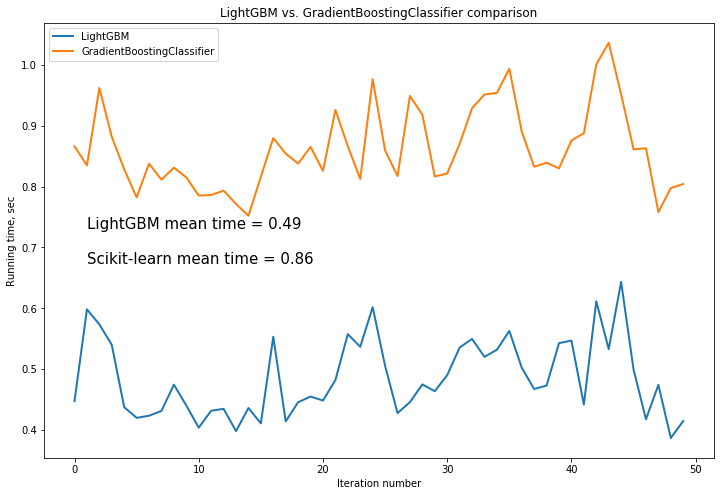

In [87]:
%matplotlib  inline
import matplotlib.pyplot as plt

lgb_mean = sum(lgb_time) / n_runs
sklearn_mean = sum(sklearn_time) / n_runs

plt.figure(figsize=(12, 8))
plt.plot(lgb_time, label='LightGBM', lw=2)
plt.plot(sklearn_time, label='GradientBoostingClassifier', lw=2)
plt.legend(loc='best')
plt.text(1, (lgb_mean + sklearn_mean) / 2, 
         'LightGBM mean time = %.2f sec.' % lgb_mean +
         '\n\nScikit-learn mean time = %.2f sec.' % sklearn_mean,
            fontsize = 15)
plt.xlabel('Iteration number')
plt.ylabel('Running time, sec')
plt.title('LightGBM vs. GradientBoostingClassifier comparison')
plt.show()

И график качества классификации:

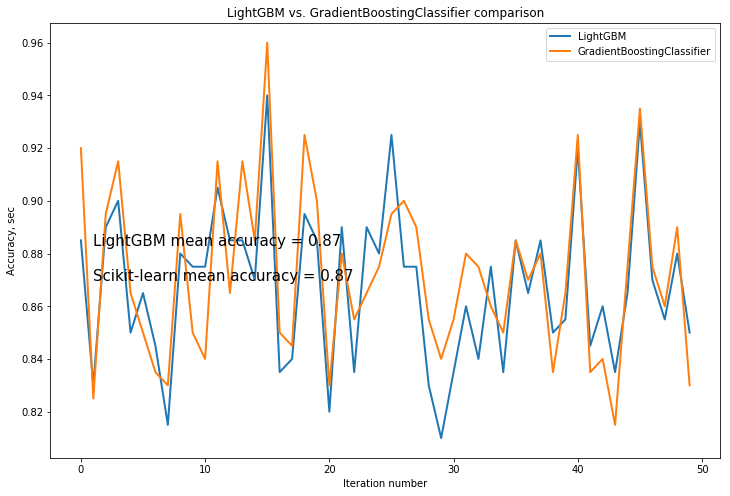

In [88]:
%matplotlib  inline
import matplotlib.pyplot as plt

lgb_mean = sum(lgb_score) / n_runs
sklearn_mean = sum(sklearn_score) / n_runs

plt.figure(figsize=(12, 8))
plt.plot(lgb_score, label='LightGBM', lw=2)
plt.plot(sklearn_score, label='GradientBoostingClassifier', lw=2)
plt.legend(loc='best')
plt.text(1, (lgb_mean + sklearn_mean) / 2, 
         'LightGBM mean accuracy = %.2f' % lgb_mean +
         '\n\nScikit-learn mean accuracy = %.2f' % sklearn_mean,
            fontsize = 15)
plt.xlabel('Iteration number')
plt.ylabel('Accuracy, sec')
plt.title('LightGBM vs. GradientBoostingClassifier comparison')
plt.show()

## Выводы

Основные преимущества LightGBM по сравнению с sklearn.ensembles.GradientBoostingClassifier:
- Помимо деревьев возможно использование линейных моделей в качестве базовых классификаторов.
- Скорость работы.
- Возможность распараллеливания.
- Значительно больший выбор стандартных функций потерь, а также возможность задавать свою функцию потерь.
- Наличие регуляризаторов в итоговой функции потерь и возможность задавать их коэффициенты, что даёт еще один метод борьбы с переобучением, помимо использования случайности (subsample, colsample_bytree) и основных параметров дерева решений.
- Встроенная обработка missing values.

### Вопрос: переобучается ли градиентный бустинг?

<img src='img/norm_overfit_ru.jpg' width=500>

## Дополнительный материал

### Соревнование <a href='https://www.kaggle.com/c/porto-seguro-safe-driver-prediction'> Porto Seguro Safe Driver's Prediction </a>

Будем предсказывать вероятность того, что держатель автомобильной страховки подаст иск на компанию.

In [41]:
import numpy as np
import pandas as pd
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [27]:
train = pd.read_csv('data/train.csv')

Посмотрим на датасет:

In [28]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [29]:
train.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


Данные обезличены, понять, какой признак за что отвечает нельзя. Единственная доступная информация - это группировки (каждый признак относится к одной из трех групп: `ind`, `car`, `calc`)

У названий признаков есть постфиксы - `bin` для бинарных признаков, `cat` для категориальных. Для численных признаков постфикса нет. Пропуски в данных уже предобработаны: если в графе стоит `-1`, это значит, что значение было пропущено.

In [30]:
# get the labels
y = train.target.values

Таргет означает, был или нет подан иск конкретным держателем страховки. Посмотрим на сбалансированность классов. Будем считать, что вероятность выше 0.5 означает подачу иска, иначе - отсутствие иска.

In [35]:
from collections import Counter

Counter(y)

Counter({0: 573518, 1: 21694})

In [36]:
# get the features
train.drop(['id', 'target'], inplace=True, axis=1)
x = train.values

In [7]:
# Create training and validation sets
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
categorical_features = [c for c, col in enumerate(train.columns) if 'cat' in col]

In [38]:
categorical_features

[1, 3, 4, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]

In [8]:
# Create the LightGBM data containers
train_data = lightgbm.Dataset(
    x,
    label=y,
    categorical_feature=categorical_features
)

test_data = lightgbm.Dataset(x_test, label=y_test)

Параметры модели:

In [9]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

Обучение модели:

In [10]:
# train the model
model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

/Users/yanina-n/miniconda3/envs/Clear_python3/lib/python3.6/site-packages/lightgbm/basic.py:1040: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/yanina-n/miniconda3/envs/Clear_python3/lib/python3.6/site-packages/lightgbm/basic.py:1042: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is [1, 3, 4, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/Users/yanina-n/miniconda3/envs/Clear_python3/lib/python3.6/site-packages/lightgbm/basic.py:685: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[1]	valid_0's auc: 0.587454
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.600187
[3]	valid_0's auc: 0.604699
[4]	valid_0's auc: 0.611374
[5]	valid_0's auc: 0.613078
[6]	valid_0's auc: 0.614256
[7]	valid_0's auc: 0.615208
[8]	valid_0's auc: 0.616592
[9]	valid_0's auc: 0.618192
[10]	valid_0's auc: 0.618957
[11]	valid_0's auc: 0.619668
[12]	valid_0's auc: 0.620406
[13]	valid_0's auc: 0.620509
[14]	valid_0's auc: 0.620655
[15]	valid_0's auc: 0.620844
[16]	valid_0's auc: 0.621258
[17]	valid_0's auc: 0.621498
[18]	valid_0's auc: 0.622105
[19]	valid_0's auc: 0.621989
[20]	valid_0's auc: 0.621608
[21]	valid_0's auc: 0.621841
[22]	valid_0's auc: 0.622693
[23]	valid_0's auc: 0.622832
[24]	valid_0's auc: 0.622936
[25]	valid_0's auc: 0.623135
[26]	valid_0's auc: 0.623084
[27]	valid_0's auc: 0.622904
[28]	valid_0's auc: 0.623089
[29]	valid_0's auc: 0.623531
[30]	valid_0's auc: 0.623823
[31]	valid_0's auc: 0.624303
[32]	valid_0's auc: 0.624457
[33]	valid_0's auc

Делаем предсказание для тестовой выборки (файл `data/test.csv`):

In [39]:
# load test data
submission = pd.read_csv('data/test.csv')
ids = submission['id'].values
submission.drop('id', inplace=True, axis=1)

# prepare features from test sample
x = submission.values
# prepare predicted labels for test sample
y_pred = model.predict(x)

In [40]:
y_pred

array([0.33572365, 0.3663867 , 0.45349866, ..., 0.50578861, 0.37637787,
       0.42743183])

Сохраняем предсказания в файл и отправляем в <a href='https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/submit'> Kaggle </a>:

In [ ]:
# save predicted labels to the file
output = pd.DataFrame({'id': ids, 'target': y_pred})
output.to_csv("data/submission.csv", index=False)

### Полезные ссылки:

1. <a href='https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db'> Сравнение XgBoost, LightGBM и CatBoost </a>
2. <a href='http://xgboost.readthedocs.io'> Документация XgBoost </a>
3. <a href='https://lightgbm.readthedocs.io/en/latest/'> Документация LightGBM </a>
4. <a href='https://tech.yandex.com/catboost/doc/dg/concepts/about-docpage/'> Документация CatBoost </a>
5. <a href='http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html'> Документация sklearn.ensemble.GradientBoostingClassifier </a>
6. <a href='https://habr.com/company/ods/blog/327250/'> Статья ODS про бустинг </a>
7. <a href='https://alexanderdyakonov.wordpress.com/2017/06/09/градиентный-бустинг/comment-page-1/'> Статья А.Дьяконова про градиентный бустинг </a>
